# How to write dynamic Jupyter eBook Content

This document is meant to provide you with a very quick introduction into the writing of Jupyter eBook content and the dynamic aspects of these eBooks. 

What make writing material in the Jupyter eBook format so convenient for online scientific articles (and larger book size publications) is that the content can be a mixture of straight forward Markdown texts, code executing markdown cells and references to content that is generated by Jupyter Notebooks in the project directory structure.

This means that the final book is assembled from straight Markdown texts in md-files that can be enhanced with for instance python cells that execute code and generate graphs. Then furthermore the books can reference Jupyter Notebook files that consist of their own mardown and code cells. All of this is transparently merged into a single static website that represents the generated content of the book.

> NOTE: the framework also support referencing plots generated in the notebooks and displaying them int the standard Markdown files. Currently (dd. 2023/04/12) there is a bug in this glue-system that prevents the plots from displaying in the markdown files where it is referenced --cross-file referencing. References inside the generating notebook are still supported.

## The Jupyter Book Website

**The best source for the features of the Jupyter Book framework can be found at its  <a href='https://jupyterbook.org/en/stable/intro.html' target='_blank'> online website</a>.** For the more advanced features such as dynamic and interactive content we use a Jupyter Book plugin called **MyST-NB** module. The website for this powerful plugin can be found at <a href='https://myst-nb.readthedocs.io/en/latest/' target='_blank'>MYST_NB</a>. Between the functionality of these two libraries we can create extremely powerful publication solutions.

## Jupyter Book Form Factor

The Jupyter Book Form Factor allows us to write dynamic and interactive eBook content that promises highly engaging content. The underlying technology for eBooks in this format is the integration of Python code with markup language texts that get converted to static online websites. The writing process is very simple and productive and it is the basis for all material written as part of the EO4CSC Curriculum Framework; for its book series, articles and training materials.

The process is based on the embedding of what are called "code-cells" with static markup text. The code-cells contain standard executable Python code and the output of these code cells can be displayed and referenced in the markdown file of each chapter. The lexical scope of the imported Python libraries is the entire book but only after the library was iported at some point in the books generation process.
 
BEcause the 'scope of imported libraries' is the entire book so in principle we need import libraries only once before they are used in any of the code cells. I have decided however to import all libraries for a chapter at the beginning of each chapter so the chapter is a self-contained unit rather than having it depend on content from other chapters.

In each chapter we will start the content with a code-cell siilar to the next which will make those libraries available that we need for the content of that chapter. The libraries listeed in the next cell are thos that are most commonly needed by all of the chapters. The cell imports the three Python  scientific programming libraries for fast (numerical) array processing by the numpy library, the datascience functions in the scikit learn library and the symbolic processing functions from the sympy library. Most chapters will need additional libraries so these will be added to the import code-cell as necessary at the beginning of each chapter.

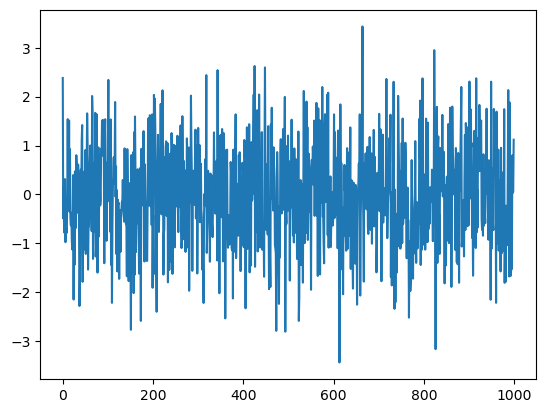

In [1]:
import matplotlib.pyplot as plt        # this provides a shortcut alias for the plotting functions
import matplotlib                      # this makes graphing and plotting features available to the chapter code
from myst_nb import glue               # this is used to support references between markdown and code

import numpy   as np                   # this makes the numpy library available to the chapter code
import sklearn as scp                  # this makes the scipy library available to the chapter code
import sympy   as smp                  # this makes the sympy library available to the chapter code

ϵ_values = np.random.randn(1000)
plt.plot(ϵ_values)
plt.show()

What the above code-cell illustrates is how the output; a chart in this case, is dynamically generated from the embedded python code. So we don't have to cut-and-past static png-files or jpg-files into the content of the eBook. This ensures that the texttual content , the example code and the output of the code will be in sync. In some chapters, where appropriate, the dynamics will go even further and it will display widgets to the reader that support live-updates of the eBook visuals. It is this dynamic nature of the eBook format that makes the EO4CSC curriculum material so valuable (and engaging) to the reader. 

Because there is only so much that the eBook format can offer in dynamism of its content there is a complete set of Jupyter Notebooks available online that contains the sample code. The student can access these repositories to get fully customizable notebooks that can be used as starting points for further experiments or actual research computation activities.


## NumPy

Fundamental matrix and array processing capabilities are provided by the
excellent [NumPy](http://www.numpy.org/) library.

For example, let\'s build some arrays

In [2]:
import numpy as np                     # Load the library

a = np.linspace(-np.pi, np.pi, 100)    # Create even grid from -π to π
b = np.cos(a)                          # Apply cosine to each element of a
c = np.sin(a)                          # Apply sin to each element of a

Now let\'s take the inner product

In [3]:
b @ c

4.04891256782214e-16

The number you see here might vary slightly due to floating point arithmetic
but it\'s essentially zero.

As with other standard NumPy operations, this inner product calls into highly
optimized machine code.

It is as efficient as carefully hand-coded FORTRAN or C.



## SciPy

The [SciPy](http://www.scipy.org) library is built on top of NumPy and
provides additional functionality.

(tuple_unpacking_example)=
For example, let\'s calculate $\int_{-2}^2 \phi(z) dz$ where $\phi$ is
the standard normal density.

In [4]:
from scipy.stats import norm
from scipy.integrate import quad

ϕ = norm()
value, error = quad(ϕ.pdf, -2, 2)  # Integrate using Gaussian quadrature
value

0.9544997361036417

## Symbolic Algebra

It\'s useful to be able to manipulate symbolic expressions, as in
Mathematica or Maple.

The [SymPy](http://www.sympy.org/) library provides this functionality
from within the Python shell.

In [5]:
from sympy import Symbol

x, y = Symbol('x'), Symbol('y')  # Treat 'x' and 'y' as algebraic symbols
x + x + x + y

3*x + y

We can manipulate expressions

In [6]:
expression = (x + y)**2
expression.expand()

x**2 + 2*x*y + y**2

solve polynomials

In [7]:
from sympy import solve

solve(x**2 + x + 2)

[-1/2 - sqrt(7)*I/2, -1/2 + sqrt(7)*I/2]

and calculate limits, derivatives and integrals

In [8]:
from sympy import limit, sin, diff

limit(1 / x, x, 0)

oo

In [9]:
limit(sin(x) / x, x, 0)

1

In [10]:
diff(sin(x), x)

cos(x)

The beauty of importing this functionality into Python is that we are
working within a fully fledged programming language.

We can easily create tables of derivatives, generate LaTeX output, add
that output to figures and so on.

## Pandas

One of the most popular libraries for working with data is
[pandas](http://pandas.pydata.org/).

Pandas is fast, efficient, flexible and well designed.

Here\'s a simple example, using some dummy data generated with Numpy\'s
excellent `random` functionality.

In [11]:
import pandas as pd
np.random.seed(1234)

data = np.random.randn(5, 2)  # 5x2 matrix of N(0, 1) random draws
dates = pd.date_range('28/12/2010', periods=5)

df = pd.DataFrame(data, columns=('price', 'weight'), index=dates)
print(df)

               price    weight
2010-12-28  0.471435 -1.190976
2010-12-29  1.432707 -0.312652
2010-12-30 -0.720589  0.887163
2010-12-31  0.859588 -0.636524
2011-01-01  0.015696 -2.242685


In [12]:
df.mean()

price     0.411768
weight   -0.699135
dtype: float64

## Content Cross Referencing using MYST_NB Features

In [13]:
from myst_nb import glue
my_variable = "here is some text!"
glue("cool_text", my_variable)

'here is some text!'

This is a n example of using a reference to a glued variable: {glue:}`cool_text`. Note how we do not refer to the 'variable' but to the 'key' that is assigned to the variable. the way to refer to a variables key is done with the glue-directive like so: **{glue:}\`cool_text\`**. We can use this pattern for text, numbers and objects like images or even panda tables. The key for the variable --the word cool_text in this case-- must be a sible word and surrounded by back-ticks.